In [1]:
import itertools

import numpy as np

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K

import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap

np.random.seed(1)
%matplotlib inline

print('Keras Version: ', keras.__version__)

Using TensorFlow backend.


Keras Version:  2.2.2


### 1. 人工数据集

In [2]:
# Generate the dataset，同心圆环数据集,shuffle随机打乱，
X, t = make_circles(n_samples = 5000, shuffle=False, factor=0.3, noise=0.1)

# Separate the red and blue point
x_red = X[t == 0]
x_blue = X[t == 1]

print('shape of X: {}'.format(X.shape))

shape of X: (5000, 2)


In [3]:
x_red.shape

(2500, 2)

In [4]:
x_red[:5]    # 连个feature

array([[ 1.16243454, -0.06117564],
       [ 0.94717967, -0.10478359],
       [ 1.08652813, -0.22512734],
       [ 1.17445275, -0.06858094],
       [ 1.03185338, -0.01488411]])

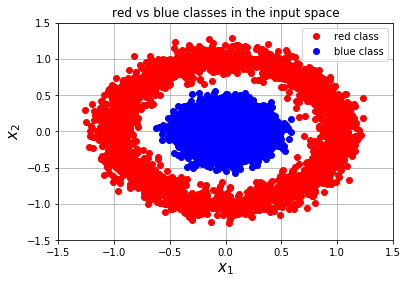

In [5]:
# Plot both classes on the x1, x2 plane
plt.plot(x_red[:,0], x_red[:,1], 'ro', label='red class')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='blue class')

plt.grid()
plt.legend(loc=1)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classes in the input space')
plt.show()

In [6]:
# Split dataset into trian and test
X_train, X_test, y_train, y_test = train_test_split(X, t, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [7]:
X_train.shape

(3500, 2)

### 1.2 逻辑回归
![logistic model](./imgs/SimpleANN02.png)

In [8]:
# Build the model with keras' sequential model
model = Sequential()
model.add(Dense(1, 
                input_dim = 2, 
                kernel_initializer = 'glorot_normal', 
                activation = 'sigmoid'))

sgd = SGD(lr=0.001, decay = 1e-6, momentum = 0.9, nesterov = True)

model.compile(loss = 'binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    batch_size = 64, 
                    epochs = 10,
                    verbose = 1)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 4s 1ms/step - loss: 0.7517 - acc: 0.5043 - val_loss: 0.7516 - val_acc: 0.5073
Epoch 2/10
3500/3500 [==============================] - 0s 74us/step - loss: 0.7463 - acc: 0.5034 - val_loss: 0.7464 - val_acc: 0.5047
Epoch 3/10
3500/3500 [==============================] - 0s 78us/step - loss: 0.7414 - acc: 0.5026 - val_loss: 0.7417 - val_acc: 0.5040
Epoch 4/10
3500/3500 [==============================] - 0s 69us/step - loss: 0.7369 - acc: 0.5011 - val_loss: 0.7373 - val_acc: 0.5020
Epoch 5/10
3500/3500 [==============================] - 0s 84us/step - loss: 0.7328 - acc: 0.4963 - val_loss: 0.7330 - val_acc: 0.4987
Epoch 6/10
3500/3500 [==============================] - 0s 85us/step - loss: 0.7289 - acc: 0.4971 - val_loss: 0.7293 - val_acc: 0.4987
Epoch 7/10
3500/3500 [==============================] - 0s 75us/step - loss: 0.7254 - acc: 0.4949 - val_loss: 0.7259 - val_acc: 0.4967
Epoch 8/

训练误差一直是0.50左右，就是瞎懵。

In [9]:
#Predition function by calling keras model predict method
#Will use 0.5 as threshold for binary classification
def nn_predict(model, X):
    
    return (model.predict(X) > 0.5).astype(int)

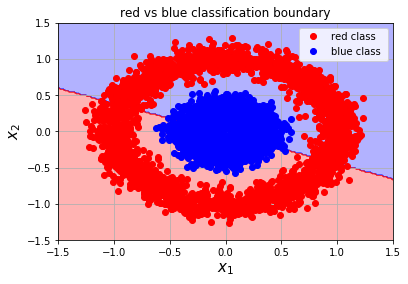

In [10]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
y_test_pred = nn_predict(model, X_test)
#Show confusion table
conf_matrix = confusion_matrix(y_test, y_test_pred, labels = None)

Confusion matrix, without normalization
[[356 365]
 [395 384]]


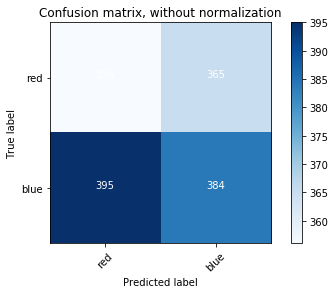

In [13]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')

试试加入$x_1^2$和$x_2^2$,作为feature，看效果怎么样。

### 1.3 Neural Network with Nonlinear Activation
In the previous section, we see that the logistic cannot correctly separate the two classes. The reason is that logistic regression is a linear model, which cannot separate nonlinear problem. From the classification boundary graph, we saw the separation bounday is a linear line. 

To correctly separate the two classes, we need add some nonlinear activation function and with more hidden layers. Keras offer lots of nonlinear functions: tanh, relu, sigmoid, softplus, etc. For more information, please see [Activation Functions in keras](https://keras.io/activations/).

In this part, we will use a user-defined activation function, radial basis funciton(RBF). The RBF is a transfer function that is not usually used in neural networks, except for radial basis function networks. One of the most common transfer functions in neural networks is the sigmoid function. The RBF will allow to separate the blue samples from the red samples in this simple example by only activating for a certain region around the origin. The RBF is plotted in the figure below and is defined in this example as:

$$\text{RBF} = \phi(z) = e^{-z^2} $$

The derivative of this RBF function is:

$$\frac{d \phi(z)}{dz} = -2 z e^{-z^2} = -2 z \phi(z)$$

类似高斯变换的激活函数

In [14]:
#Define the rbf function for visual purpose
def rbf_np(z):
    return np.exp(-z**2)

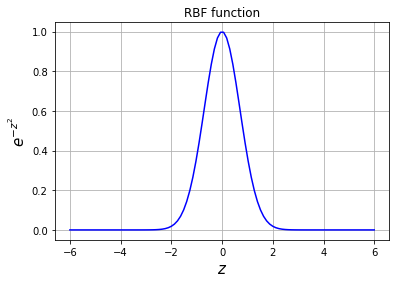

In [15]:
#Plot the rbf function
z = np.linspace(-6, 6, 100)
plt.plot(z, rbf_np(z), 'b-')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$e^{-z^2}$', fontsize=15)
plt.title('RBF function')
plt.grid()
plt.show()

In [16]:
#Radius basis function for keras activation
def rbf(x):
    return K.exp(-1.0 * x ** 2)

In [17]:
#Build the model with keras' sequential model
# 多一个隐藏层，并用了RBF
model = Sequential()
model.add(Dense(3, 
                input_dim = 2, 
                kernel_initializer = 'glorot_normal'))
model.add(Activation(rbf))
model.add(Dense(1, 
                input_dim = 3, 
                kernel_initializer = 'glorot_normal', 
                activation = 'sigmoid'))

In [18]:
sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'binary_crossentropy', 
              metrics=['accuracy'], 
              optimizer = sgd)
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    batch_size = 64, 
                    epochs = 10, 
                    verbose = 1)

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 1s 206us/step - loss: 0.6486 - acc: 0.6700 - val_loss: 0.5826 - val_acc: 0.8220
Epoch 2/10
3500/3500 [==============================] - 1s 210us/step - loss: 0.5549 - acc: 0.8300 - val_loss: 0.5227 - val_acc: 0.8473
Epoch 3/10
3500/3500 [==============================] - 1s 147us/step - loss: 0.5038 - acc: 0.8446 - val_loss: 0.4821 - val_acc: 0.8473
Epoch 4/10
3500/3500 [==============================] - 0s 136us/step - loss: 0.4687 - acc: 0.8434 - val_loss: 0.4526 - val_acc: 0.8440
Epoch 5/10
3500/3500 [==============================] - 0s 94us/step - loss: 0.4403 - acc: 0.8440 - val_loss: 0.4235 - val_acc: 0.8440
Epoch 6/10
3500/3500 [==============================] - 0s 88us/step - loss: 0.4094 - acc: 0.8446 - val_loss: 0.3875 - val_acc: 0.8473
Epoch 7/10
3500/3500 [==============================] - 0s 82us/step - loss: 0.3727 - acc: 0.8786 - val_loss: 0.3476 - val_acc: 0.9060
Epo

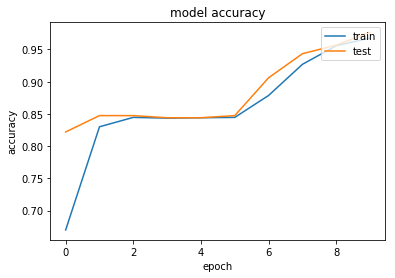

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

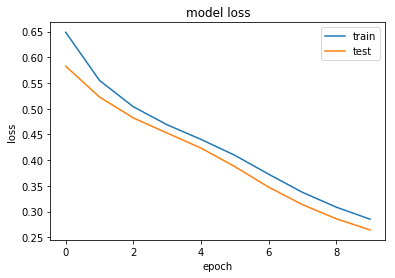

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

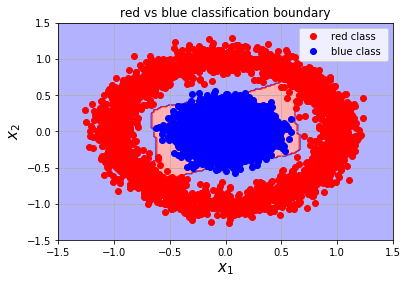

In [21]:
#Plot the resulting decision boundary
#Generate a grid over the input space to plot the color of the
#classification at that grid point
nb_of_xs = 200
xs1 = np.linspace(-2, 2, num = nb_of_xs)
xs2 = np.linspace(-2, 2, num = nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
#Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        pred = nn_predict(model, np.array([[xx[i,j], yy[i,j]]]))
        classification_plane[i, j] = pred[0, 0]
#Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('b', alpha = 0.30),
        colorConverter.to_rgba('r', alpha = 0.30)])

#Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap = cmap)
#Plot both classes on the x1, x2 plane
plt.plot(x_red[:, 0], x_red[:, 1], 'ro', label = 'red class')
plt.plot(x_blue[:, 0], x_blue[:, 1], 'bo', label = 'blue class ')
plt.grid()
plt.legend(loc = 1)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.title('red vs blue classification boundary')
plt.show()

出问题了，可能陷入了局部

In [22]:
t_pred = nn_predict(model, X)
#Show confusion table
conf_matrix = confusion_matrix(t, t_pred, labels = None)

Confusion matrix, without normalization
[[2426   74]
 [  38 2462]]


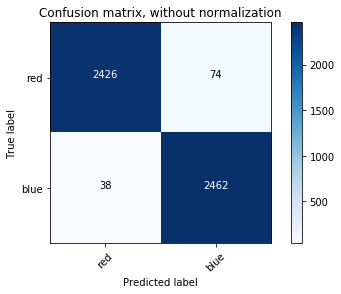

In [23]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['red', 'blue'],
                      title='Confusion matrix, without normalization')